<a href="https://colab.research.google.com/github/bimbim22/miscellaneous-analysis/blob/main/FPT%2520analysis/FPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Data

In [47]:
# !pip install setuptools==65.5.0

In [ ]:
!pip install pandas_profiling==3.2.0

In [49]:
!pip install git+https://github.com/carlosluis/stable-baselines3@fix_tests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/carlosluis/stable-baselines3 (to revision fix_tests) to /tmp/pip-req-build-qw78k4o2
  Running command git clone --filter=blob:none --quiet https://github.com/carlosluis/stable-baselines3 /tmp/pip-req-build-qw78k4o2
  Running command git checkout -b fix_tests --track origin/fix_tests
  Switched to a new branch 'fix_tests'
  Branch 'fix_tests' set up to track remote branch 'fix_tests' from 'origin'.
  Resolved https://github.com/carlosluis/stable-baselines3 to commit 6617e6e73cb3a70f3e88cea780ea12bed95c099e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [50]:
from stable_baselines3.ppo.policies import MlpPolicy
from stable_baselines3.dqn.policies import MlpPolicy

In [51]:
import stable_baselines3
stable_baselines3.__version__

'2.0.0a0'

In [52]:
import gym
import stable_baselines3

from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import DQN
from stable_baselines3 import A2C
from stable_baselines3 import PPO

In [53]:
import numpy as np
import random
import pandas as pd
#import jinja2
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
raw_fpt = pd.read_csv('https://github.com/bimbim22/miscellaneous-analysis/raw/main/FPT%20analysis/FPT.csv')

# Preprocessing Data

In [56]:
raw_fpt.head()

Ticker        Date/Time   Open   High    Low  Close  Volume  Open Interest
0    FPT  12/25/2018 9:15  30.89  30.89  30.89  30.89   35410              0
1    FPT  12/25/2018 9:16  30.81  30.81  30.81  30.81     190              0
2    FPT  12/25/2018 9:17  30.74  30.81  30.74  30.74    1120              0
3    FPT  12/25/2018 9:18  30.74  30.74  30.74  30.74    2120              0
4    FPT  12/25/2018 9:19  30.74  30.74  30.74  30.74   22500              0

In [57]:
raw_fpt.shape

(97406, 8)

In [58]:
np.sum(raw_fpt.isna())

Ticker           0
Date/Time        0
Open             0
High             0
Low              0
Close            0
Volume           0
Open Interest    0
dtype: int64

In [59]:
fpt_data = raw_fpt
fpt_data['Date'] = np.empty((len(raw_fpt), 1))
fpt_data['Total Volume'] = np.zeros((len(raw_fpt), 1))

fpt_data['Date'] = pd.to_datetime(fpt_data['Date/Time']).dt.date
fpt_data['copied_date'] = fpt_data['Date']

In [60]:
fpt_data = pd.get_dummies(fpt_data, columns = ['copied_date'], prefix = None)

In [61]:
fpt_data.shape
fpt_data.head()

Ticker        Date/Time   Open   High    Low  Close  Volume  Open Interest  \
0    FPT  12/25/2018 9:15  30.89  30.89  30.89  30.89   35410              0   
1    FPT  12/25/2018 9:16  30.81  30.81  30.81  30.81     190              0   
2    FPT  12/25/2018 9:17  30.74  30.81  30.74  30.74    1120              0   
3    FPT  12/25/2018 9:18  30.74  30.74  30.74  30.74    2120              0   
4    FPT  12/25/2018 9:19  30.74  30.74  30.74  30.74   22500              0   

         Date  Total Volume  ...  copied_date_2020-12-09  \
0  2018-12-25           0.0  ...                       0   
1  2018-12-25           0.0  ...                       0   
2  2018-12-25           0.0  ...                       0   
3  2018-12-25           0.0  ...                       0   
4  2018-12-25           0.0  ...                       0   

   copied_date_2020-12-10  copied_date_2020-12-11  copied_date_2020-12-14  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   copied_date_2020-12-15  copied_date_2020-12-16  copied_date_2020-12-17  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   copied_date_2020-12-18  copied_date_2020-12-21  copied_date_2020-12-22  
0                       0                       0                       0  
1                       0                       0                       0  
2                       0                       0                       0  
3                       0                       0                       0  
4                       0                       0                       0  

[5 rows x 509 columns]

In [62]:
total_volume = np.dot(fpt_data['Volume'], fpt_data.iloc[:, 10:])

In [63]:
fpt_data = fpt_data.drop_duplicates(subset = ['Date'], keep = 'first')
fpt_data = fpt_data.iloc[:, 2:9]
fpt_data['Total Volume'] = total_volume

In [64]:
fpt_data.head()

Open   High    Low  Close  Volume  Open Interest        Date  \
0    30.89  30.89  30.89  30.89   35410              0  2018-12-25   
7    31.04  31.11  31.04  31.11    2650              0  2018-12-26   
133  31.41  31.52  31.41  31.49   13610              0  2018-12-27   
267  31.34  31.34  31.34  31.34   13490              0  2018-12-28   
389  31.19  31.34  31.19  31.34   86430              0  2019-01-02   

     Total Volume  
0           84960  
7          333590  
133        454860  
267        387170  
389        459120

In [65]:
pandas_profiling.ProfileReport(fpt_data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

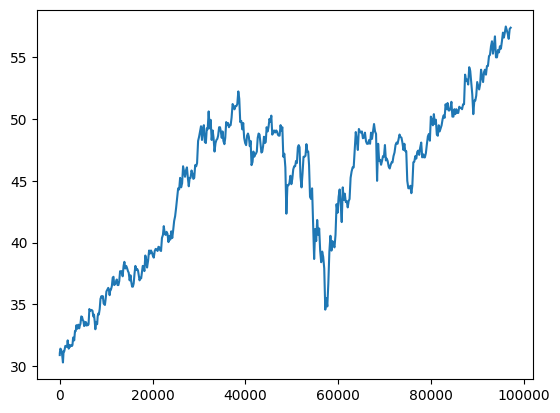

In [66]:
plt.plot(fpt_data['Open'])

In [67]:
up_down = np.zeros((len(fpt_data), 1))
for i in range(len(fpt_data) - 1):
  up_down[i+1] = fpt_data['Open'].iloc[i+1] > fpt_data['Open'].iloc[i]

print(np.sum(up_down))
print(len(fpt_data) - np.sum(up_down))
np.sum(up_down) / len(fpt_data)

253.0
246.0


0.5070140280561122

# Modelling

## Tree Rregression

In [68]:
n = len(fpt_data)

fpt_data['fpt_5'] = np.zeros((n, 1))
fpt_data['fpt_4'] = np.zeros((n, 1))
fpt_data['fpt_3'] = np.zeros((n, 1))
fpt_data['fpt_2'] = np.zeros((n, 1))
fpt_data['fpt_1'] = np.zeros((n, 1))

for i in range(5, len(fpt_data)):

  fpt_data['fpt_5'].iloc[i] = fpt_data['Open'].iloc[i-5]
  fpt_data['fpt_4'].iloc[i] = fpt_data['Open'].iloc[i-4]
  fpt_data['fpt_3'].iloc[i] = fpt_data['Open'].iloc[i-3]
  fpt_data['fpt_2'].iloc[i] = fpt_data['Open'].iloc[i-2]
  fpt_data['fpt_1'].iloc[i] = fpt_data['Open'].iloc[i-1]

fpt_data['fpt_today'] = fpt_data['Open']

<ipython-input-68-b5b916b42ed1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpt_data['fpt_5'].iloc[i] = fpt_data['Open'].iloc[i-5]
<ipython-input-68-b5b916b42ed1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpt_data['fpt_4'].iloc[i] = fpt_data['Open'].iloc[i-4]
<ipython-input-68-b5b916b42ed1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fpt_data['fpt_3'].iloc[i] = fpt_data['Open'].iloc[i-3]
<ipython-input-68-b5b916b42e

In [69]:
fpt_subset = fpt_data.iloc[5:, 7:]
fpt_subset.head()

Total Volume  fpt_5  fpt_4  fpt_3  fpt_2  fpt_1  fpt_today
506         716600  30.89  31.04  31.41  31.34  31.19      30.93
687         318570  31.04  31.41  31.34  31.19  30.93      30.29
822         408470  31.41  31.34  31.19  30.93  30.29      31.19
964         295660  31.34  31.19  30.93  30.29  31.19      31.19
1072        309040  31.19  30.93  30.29  31.19  31.19      31.41

In [70]:
shuffled_fpt = fpt_subset.sample(frac = 1, random_state = 42)

X_train = shuffled_fpt.iloc[0:300, 0:6]
Y_train = shuffled_fpt.iloc[0:300, 6]
X_test = shuffled_fpt.iloc[300:, 0:6]
Y_test = shuffled_fpt.iloc[300:, 6]

X_train.shape, Y_test.shape

((300, 6), (194,))

In [71]:
random.seed(42)

tree_model = tree.DecisionTreeRegressor().fit(X_train, Y_train)
Y_pred = tree_model.predict(X_test)
mean_squared_error(Y_pred, Y_test)

1.397063917525773

In [72]:
tree_model.feature_importances_

array([0.00213715, 0.00226337, 0.00198471, 0.00643111, 0.77573346,
       0.2114502 ])

## Gradient Boost

In [73]:
GBR_model = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 1, random_state = 42,
                                      loss='squared_error').fit(X_train, Y_train)
Y_pred = GBR_model.predict(X_test)
mean_squared_error(Y_test, Y_pred)

0.7450733121264111

In [74]:
np.round(GBR_model.feature_importances_, 3)

array([0.   , 0.005, 0.001, 0.027, 0.354, 0.613])

## GRU

In [75]:
time_step = 3
values_to_predict = 1

def create_set(set_):

    X = []
    Y = []

    for i in range(len(set_) - time_step - values_to_predict):
        data_in_one_time_step = set_[i : i+time_step]
        next_one = set_[i+time_step: i+time_step+values_to_predict]
        X.append(data_in_one_time_step)
        Y.append(next_one)

    X = np.array(X).reshape(-1, time_step, 1)
    Y = np.array(Y)
    
    return X, Y

In [76]:
shuffled_fpt = fpt_data.sample(frac = 1)
X_train, Y_train = create_set(shuffled_fpt['Open'][:300])
X_test, Y_test = create_set(shuffled_fpt['Open'][300:])

X_train.shape, X_test.shape

((296, 3, 1), (195, 3, 1))

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Conv1D, TimeDistributed, BatchNormalization, SimpleRNN

In [78]:
gru_model = tf.keras.models.Sequential([Conv1D(filters = 30, kernel_size = 3, input_shape = [3, 1]),
                                        GRU(30), Dropout(0.05), Dense(values_to_predict)])

gru_model.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(lr = 0.05))

#callbacks = [tf.keras.callbacks.EarlyStopping(patience = 400),
             #tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 100, monitor = 'loss')]

In [79]:
history = gru_model.fit(X_train, Y_train,
                         epochs = 600, batch_size = 16)
                         #callbacks = callbacks)

Epoch 1/600
19/19 [==============================] - 2s 2ms/step - loss: 1811.7112
Epoch 2/600
19/19 [==============================] - 0s 3ms/step - loss: 1676.2196
Epoch 3/600
19/19 [==============================] - 0s 3ms/step - loss: 1604.9933
Epoch 4/600
19/19 [==============================] - 0s 3ms/step - loss: 1559.8258
Epoch 5/600
19/19 [==============================] - 0s 3ms/step - loss: 1519.3647
Epoch 6/600
19/19 [==============================] - 0s 3ms/step - loss: 1432.0688
Epoch 7/600
19/19 [==============================] - 0s 3ms/step - loss: 1369.1854
Epoch 8/600
19/19 [==============================] - 0s 3ms/step - loss: 1312.7858
Epoch 9/600
19/19 [==============================] - 0s 2ms/step - loss: 1261.2152
Epoch 10/600
19/19 [==============================] - 0s 4ms/step - loss: 1207.0562
Epoch 11/600
19/19 [==============================] - 0s 3ms/step - loss: 1167.7688
Epoch 12/600
19/19 [==============================] - 0s 4ms/step - loss: 1126.5745
E

In [80]:
Y_pred = gru_model.predict(X_test)
mean_squared_error(Y_test, Y_pred)

7/7 [==============================] - 0s 3ms/step


44.20905821711309

# Draft

In [33]:
from gym.envs.registration import register

In [34]:
register( id='Blackjack-natural-v0', entry_point='gym.envs.toy_text:BlackjackEnv', kwargs={'natural': True} )

In [ ]:
env = gym.make('forex-v0', df=fpt_data, frame_bound=(5,200), window_size=5)

In [ ]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
env_maker = lambda: gym.make('stocks-v0', df=fpt_data, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C(MlpPolicy, env = env, verbose=1) 
model.learn(total_timesteps=10000)

Ticker         Date/Time   Open   High    Low  Close  Volume  \
0        FPT   12/25/2018 9:15  30.89  30.89  30.89  30.89   35410   
1        FPT   12/25/2018 9:16  30.81  30.81  30.81  30.81     190   
2        FPT   12/25/2018 9:17  30.74  30.81  30.74  30.74    1120   
3        FPT   12/25/2018 9:18  30.74  30.74  30.74  30.74    2120   
4        FPT   12/25/2018 9:19  30.74  30.74  30.74  30.74   22500   
...      ...               ...    ...    ...    ...    ...     ...   
97401    FPT  12/22/2020 14:24  58.20  58.20  58.20  58.20   27470   
97402    FPT  12/22/2020 14:25  58.20  58.20  58.20  58.20   14820   
97403    FPT  12/22/2020 14:26  58.20  58.20  58.20  58.20     500   
97404    FPT  12/22/2020 14:29  58.10  58.10  58.10  58.10    2500   
97405    FPT  12/22/2020 14:46  58.10  58.10  58.10  58.10   11170   

       Open Interest  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
97401              0  
97402              0  
97403              0  
97404              0  
97405              0  

[97406 rows x 8 columns]